In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import dabest
from scipy import stats
import itertools

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v0.2.7


In [15]:
def colwise_ttest(data: pd.DataFrame) -> pd.DataFrame:
    """Execute pairwise t-test for given dataframe.

    Parameters
    ----------
    data : pd.DataFrame

    Returns
    -------
    pd.DataFrame
    """
    colpairs = itertools.combinations(data.columns, 2)
    # Keep same reporter columns only.
    colpairs = [pair for pair in colpairs if pair[0].split("_")[-1] == pair[1].split("_")[-1]]
    df = pd.DataFrame(colpairs, columns=["pair0", "pair1"])
    df["pvalue"] = [
        stats.ttest_ind(data[pair[0]], data[pair[1]], equal_var=False).pvalue for pair in colpairs
    ]
    return df

In [ ]:
# Load the csv dataset
A549 = pd.read_csv("180911_dose2.csv")
ratio_volume_df = A549.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
ratio_colony_df = A549.iloc[:, [8, 9, 10, 11, 12, 13, 14, 15]]

In [19]:
# Execute t-test
colwise_ttest(ratio_volume_df)

pair0      pair1    pvalue
0   G10C0_639   G9C1_639  0.001913
1   G10C0_639   G5C5_639  0.035042
2   G10C0_639  G0C10_639  0.008814
3   G10C0_590   G9C1_590  0.045164
4   G10C0_590   G5C5_590  0.062809
5   G10C0_590  G0C10_590  0.004721
6    G9C1_639   G5C5_639  0.138643
7    G9C1_639  G0C10_639  0.001209
8    G9C1_590   G5C5_590  0.064568
9    G9C1_590  G0C10_590  0.004764
10   G5C5_639  G0C10_639  0.023806
11   G5C5_590  G0C10_590  0.008674

In [20]:
colwise_ttest(ratio_colony_df)

pair0        pair1    pvalue
0   G10C0_639.1   G9C1_639.1  0.001506
1   G10C0_639.1   G5C5_639.1  0.018842
2   G10C0_639.1  G0C10_639.1  0.003751
3   G10C0_590.1   G9C1_590.1  0.010389
4   G10C0_590.1   G5C5_590.1  0.002532
5   G10C0_590.1  G0C10_590.1  0.000111
6    G9C1_639.1   G5C5_639.1  0.077905
7    G9C1_639.1  G0C10_639.1  0.000835
8    G9C1_590.1   G5C5_590.1  0.003133
9    G9C1_590.1  G0C10_590.1  0.000113
10   G5C5_639.1  G0C10_639.1  0.012132
11   G5C5_590.1  G0C10_590.1  0.000343

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


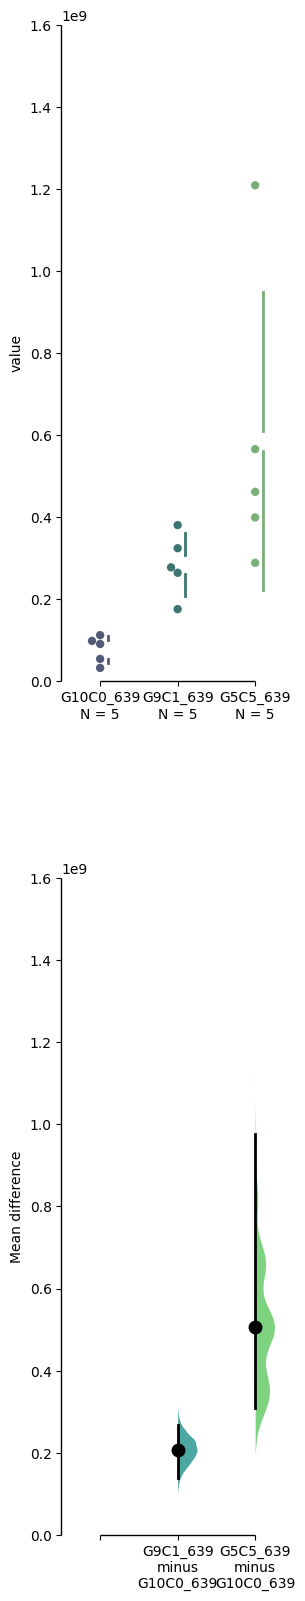

In [9]:
# Create mean_diff plot for GFP-volume using dabest.
ratio_volume_dabest = dabest.load(ratio_volume_df, idx=("G10C0_639", "G9C1_639", "G5C5_639"), ci=95)
ratio_volume_dabest.mean_diff.plot(
    fig_size=(3, 20), custom_palette="viridis", swarm_ylim=(0, 1600000000), contrast_ylim=(0, 1600000000)
)
plt.savefig("180911_A549_dose_Vol_02_demo.png")
plt.savefig("180911_A549_dose_Vol_02_demo.eps")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


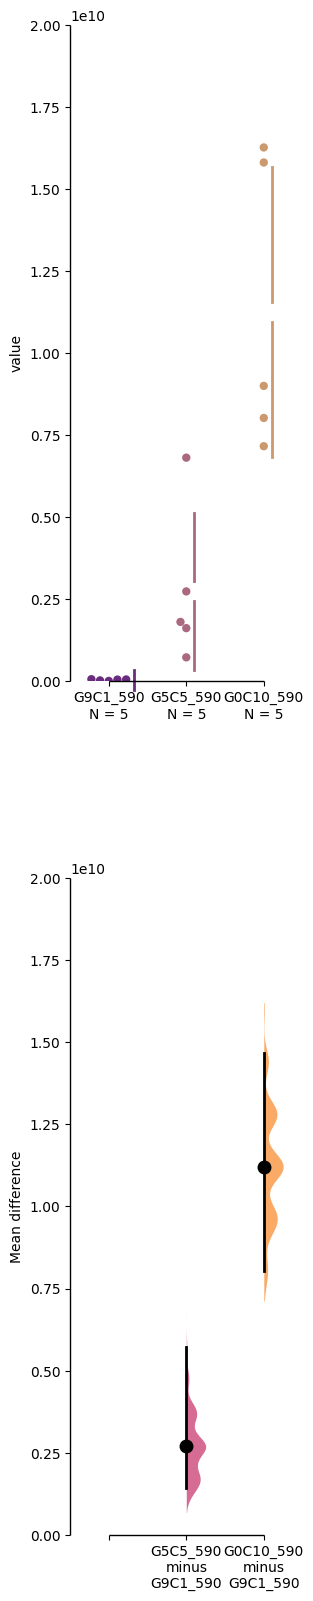

In [10]:
# Create mean_diff plot for mCherry-volume using dabest.
ratio_volume_dabest = dabest.load(ratio_volume_df, idx=("G9C1_590", "G5C5_590", "G0C10_590"), ci=95)
ratio_volume_dabest.mean_diff.plot(
    fig_size=(3, 20), custom_palette="plasma", swarm_ylim=(0, 20000000000), contrast_ylim=(0, 20000000000)
)
plt.savefig("180911_A549_dose_Vol_03_demo.png")
plt.savefig("180911_A549_dose_Vol_03_demo.pdf")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


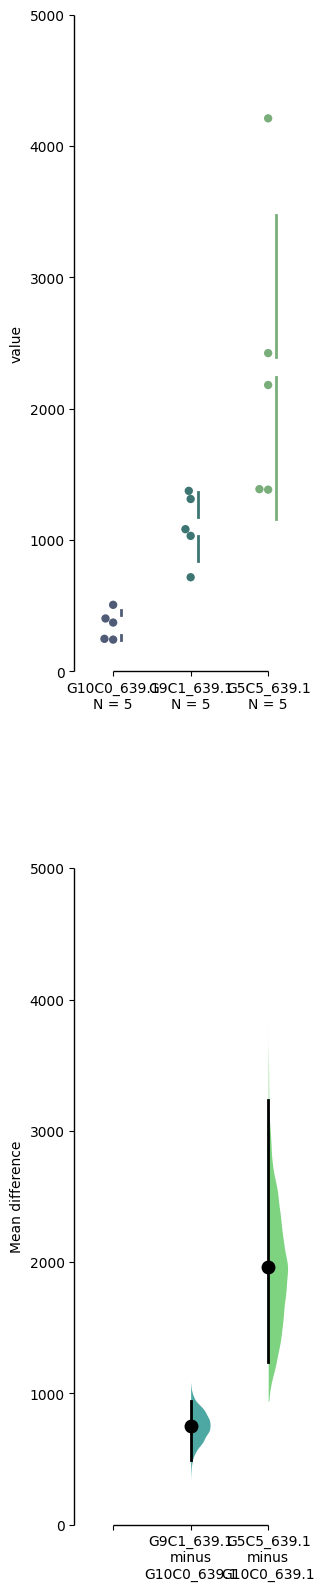

In [11]:
# Create mean_diff plot for GFP-colonyCount using dabest.
ratio_colony_dabest = dabest.load(ratio_colony_df, idx=("G10C0_639.1", "G9C1_639.1", "G5C5_639.1"), ci=95)
ratio_colony_dabest.mean_diff.plot(
    fig_size=(3, 20), custom_palette="viridis", swarm_ylim=(0, 5000), contrast_ylim=(0, 5000)
)
plt.savefig("180911_A549_dose_Num_04_demo.png")
plt.savefig("180911_A549_dose_Num_04_demo.pdf")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys
/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


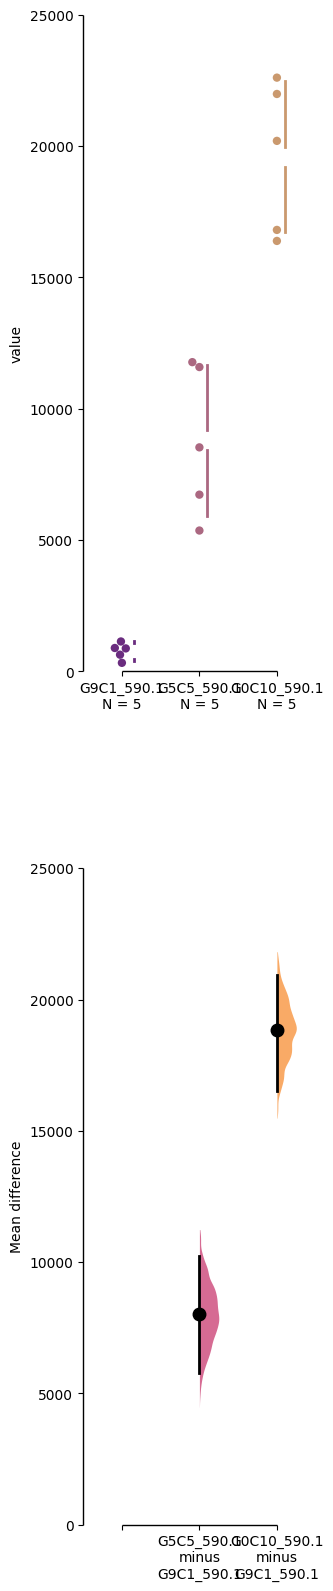

In [12]:
# Create mean_diff plot for GFP-colonyCount using dabest.
ratio_colony_dabest = dabest.load(ratio_colony_df, idx=("G9C1_590.1", "G5C5_590.1", "G0C10_590.1"), ci=95)
ratio_colony_dabest.mean_diff.plot(
    fig_size=(3, 20), custom_palette="plasma", swarm_ylim=(0, 25000), contrast_ylim=(0, 25000)
)
plt.savefig("180911_A549_dose_Num_05_demo.png")
plt.savefig("180911_A549_dose_Num_05_demo.pdf")